In [1]:
from bnltk.tokenize import Tokenizers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import string
import collections
import codecs

In [2]:
Input_file = '/media/md-jahed/Code Project/ML & NLP/5_Sentiment/ecommerce_dataset.txt'
Stopwords_list = '/media/md-jahed/Code Project/ML & NLP/5_Sentiment/stopwords.txt'

In [3]:
counter = collections.Counter()
tokenizer = Tokenizers()
maxlen = 0
xs, ys = [], []
bangla_stopwords = codecs.open(Stopwords_list, 'r', encoding='utf-8').read().split('\n')
file = codecs.open(Input_file,'r', encoding='utf-16')
punctuations_marks = set(string.punctuation)

for line in file:
    _, sent = line.strip().split('\t')
    print("\nLable:",_)
    print("Sentence:", sent)
    
    #tokenizetion
    words = tokenizer.bn_word_tokenizer(sent)
    print("After Tokenization:", words)
    
    #Exclude punctuations marks
    wordsExcudePunctuations = [word for word in words if word not in punctuations_marks]
    print("After Exclude Punctuations:", wordsExcudePunctuations)
    
    #stopwords removal
    wordsExcudeStopwords = [word for word in wordsExcudePunctuations if word not in bangla_stopwords]
    print("After Stopwords Removal:", wordsExcudeStopwords)
    
    if len(wordsExcudeStopwords)>maxlen:
        maxlen = len(wordsExcudeStopwords)
        print("Max Length:", maxlen)
        
    #update word frequency counter
    for word in wordsExcudeStopwords:
        counter[word] += 1
    
    ys.append(int(_))
    xs.append(' '.join(wordsExcudeStopwords))
file.close()


Lable: 0
Sentence: অনেকগুলা অরডার আছে একটু দেখবেন
After Tokenization: ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
After Exclude Punctuations: ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
After Stopwords Removal: ['অনেকগুলা', 'অরডার', 'একটু', 'দেখবেন']
Max Length: 4

Lable: 1
Sentence: ভালোবাসা রইল ইভ্যালির প্রতি
After Tokenization: ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
After Exclude Punctuations: ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
After Stopwords Removal: ['ভালোবাসা', 'রইল', 'ইভ্যালির']

Lable: 0
Sentence: আগের প্রডাক্ট ক্লিয়ার করেন তারাতাড়ি
After Tokenization: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
After Exclude Punctuations: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
After Stopwords Removal: ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'তারাতাড়ি']

Lable: 0
Sentence: আর ভাল লাগতেছে না
After Tokenization: ['আর', 'ভাল', 'লাগতেছে', 'না']
After Exclude Punctuations: ['আর', 'ভাল', 'লাগতেছে', 'না']
After Stopwords Removal: ['ভাল', 'লাগতেছে', 'না']

Lable: 0
Sentence

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state=0)
Xtest

['দাম বাড়ানোর সময় বাড়ান কিন্ত কমানোর সময় ধান্দাবাজি ।',
 'সবাইকে বলব বাটপার দূরে থাকুন ২ টাকা বেশি গেলেও বাইরে কিনুন এরকম বাটপার ইর্কমাস দূরে থাকুন ।',
 'আপনাদের ইনবক্স সার্ভিস একেবারেই খারাপ',
 'সেলার পণ্য আপলোডের সময় ওজন ভুল দিয়েছেন গ্রাম ভেবে কেজিতে দিয়েছেন ।',
 'চমৎকার এগিয়ে চলুক',
 'চিটিং বাজ । ২টা প্রোডাক্ট অর্ডার ছিলো । শুধু ১ টা প্রোডাক্ট এসেছে নিম্নমানের',
 'সম্পূর্ণ মিথ্যা কথা আপনাদের',
 'বাজে টেস্ট',
 'বাজে কোয়ালিটি শত্রু জিনিসটা বলবো না',
 'ভাল পান্জাবি টা কম দামে ভাল জিনিস',
 'প্রাইজ বলবেন সরাসরি কমেন্ট বলবেন ইনবক্সে ডাকার',
 'বেল্ট লেদার বললেও লেদার না আর্টিফিশিয়াল লেদার',
 'সালা বাটপারের একদিন মনের মত গালি পারতাম ।',
 'ধন্যবাদ । পণ্যগুলো দ্রুত হাতে পেয়েছি ।',
 'বিশ্বাস না দয়া',
 'ম্যাক্সিমাম মানহীন পন্য বাংলাদেশের অনলাইনে বিক্রি ।',
 'সুন্দর মানের ভাল আচরণ । কেনার উন্মুখ ইন শা আল্লাহ',
 'ভাই কিনতে আগ্রহী',
 'মাশাআল্লাহ এগিয়ে যাও',
 'ডেলিভারি সার্ভিসে একেবারেই অসন্তুষ্ট',
 'পরিমাণ ভাল',
 'যতেষ্ট ভালো কোয়ালিটি',
 '৪ তারিখে ১১ টা জিনিস অর্ডার দিয়েছি এখনো পেলাম না ডেলিভ

In [5]:
#vectorization
tfidf = TfidfVectorizer(ngram_range=(1,3), use_idf=True, tokenizer = lambda x:x.split())
Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_sample: %d, n_features: %d" % Xtrain_tf.shape)

Xtest_tf = tfidf.transform(Xtest)
print("n_sample: %d, n_features: %d" % Xtest_tf.shape)

n_sample: 1223, n_features: 13854
n_sample: 408, n_features: 13854


/media/md-jahed/Code Project/ML & NLP/1*myenv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Grid Search CV

[[182  22]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



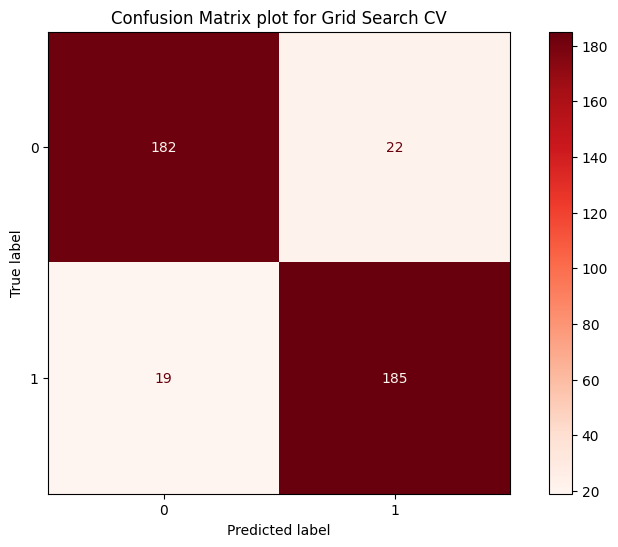

In [10]:
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import svm
grid_clf = svm.SVC(probability=True, random_state=1)
auc = make_scorer(accuracy_score)

grid_list = {"C": [0.1, 1, 10, 100],
             "gamma": [0.1, 0.01, 0.001],
             "kernel": ["rbf"],
             "class_weight": [None, "balanced"]
             }

grid_search = GridSearchCV(grid_clf,scoring=auc, param_grid=grid_list, n_jobs=1, cv=3)
grid_search.fit(Xtrain_tf,Ytrain)
grid_search.cv_results_
grid_prediction = grid_search.predict(Xtest_tf)
print(confusion_matrix(Ytest, grid_prediction))
print(classification_report(Ytest, grid_prediction))

cm = confusion_matrix(Ytest, grid_prediction)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1])
matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('Confusion Matrix plot for Grid Search CV' ,color = 'black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color = 'black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [7]:
def predict_sentiment(input_sentence):
  words = tokenizer.bn_word_tokenizer(input_sentence)
  wordsExcudePunctuations = [word for word in words if word not in punctuations_marks]
  wordsExcudeStopwords = [word for word in wordsExcudePunctuations if word not in bangla_stopwords]
  transformed_input = tfidf.transform([' '.join(wordsExcudeStopwords)])

  prediction = grid_search.predict(transformed_input)
  print(f"predicted sentiment: {'Positive' if prediction[0] == 1 else 'Negative'}")
  
  
#input  
input_sentence = "প্রোডাক্ট অবস্থা খুবই খারাপ । ইদুরের কাটা জিনিস দিয়ে দিছে "
predict_sentiment(input_sentence)

predicted sentiment: Negative
